In [1]:
!pip install numpy opencv-python matplotlib scipy scikit-learn

In [2]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.fftpack import dct, idct
import heapq
from collections import defaultdict

In [3]:
# Function to perform Huffman Coding
class Node:
    def __init__(self, frequency, symbol, left=None, right=None):
        self.frequency = frequency
        self.symbol = symbol
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.frequency < other.frequency

def huffman_coding(data):
    frequency = defaultdict(int)
    for symbol in data:
        frequency[symbol] += 1

    priority_queue = [Node(freq, sym) for sym, freq in frequency.items()]
    heapq.heapify(priority_queue)

    while len(priority_queue) > 1:
        left = heapq.heappop(priority_queue)
        right = heapq.heappop(priority_queue)
        merged = Node(left.frequency + right.frequency, None, left, right)
        heapq.heappush(priority_queue, merged)

    root = priority_queue[0]
    huffman_codes = {}

    def generate_codes(node, current_code):
        if node is not None:
            if node.symbol is not None:
                huffman_codes[node.symbol] = current_code
            generate_codes(node.left, current_code + '0')
            generate_codes(node.right, current_code + '1')

    generate_codes(root, "")
    return huffman_codes

In [4]:
# Function for JPEG-like DCT compression
def dct_compress(image, block_size=8):
    height, width = image.shape
    compressed = np.zeros_like(image)

    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = image[i:i + block_size, j:j + block_size]
            compressed[i:i + block_size, j:j + block_size] = dct(dct(block.T, norm='ortho').T, norm='ortho')

    return compressed

In [5]:
# Function to compute CR, MSE, PSNR
def compute_metrics(original, compressed):
    # Compression Ratio (CR)
    original_size = original.size * original.itemsize
    compressed_size = compressed.size * compressed.itemsize
    cr = original_size / compressed_size

    # Mean Squared Error (MSE)
    mse = mean_squared_error(original.flatten(), compressed.flatten())

    # Peak Signal-to-Noise Ratio (PSNR)
    psnr = 10 * np.log10(255**2 / mse) if mse != 0 else float('inf')

    return cr, mse, psnr

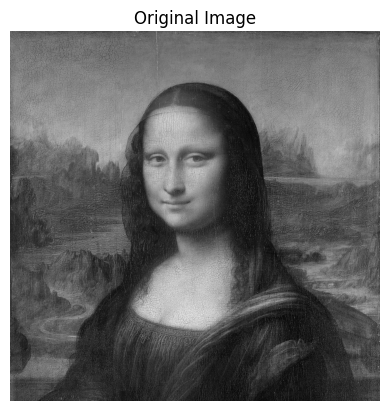

In [6]:
# Load the image
image_path = '/content/monalisa-1200x1200.jpg'  # Replace with your image file path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [7]:
# Huffman Coding
huffman_codes = huffman_coding(original_image.flatten())
print("Huffman Codes: ", huffman_codes)

Huffman Codes:  {np.uint8(57): '0000000', np.uint8(11): '00000010', np.uint8(163): '00000011', np.uint8(58): '0000010', np.uint8(52): '0000011', np.uint8(50): '0000100', np.uint8(62): '0000101', np.uint8(59): '0000110', np.uint8(136): '0000111', np.uint8(61): '0001000', np.uint8(65): '0001001', np.uint8(137): '0001010', np.uint8(63): '0001011', np.uint8(135): '0001100', np.uint8(196): '0001101000', np.uint8(233): '000110100100', np.uint8(242): '00011010010100', np.uint8(245): '000110100101010', np.uint8(252): '000110100101011000', np.uint8(253): '000110100101011001', np.uint8(248): '0001101001010110100', np.uint8(247): '0001101001010110101', np.uint8(251): '000110100101011011', np.uint8(246): '0001101001010111', np.uint8(238): '0001101001011', np.uint8(0): '00011010011', np.uint8(176): '000110101', np.uint8(162): '00011011', np.uint8(67): '0001110', np.uint8(64): '0001111', np.uint8(66): '0010000', np.uint8(134): '0010001', np.uint8(133): '0010010', np.uint8(132): '0010011', np.uint8(6

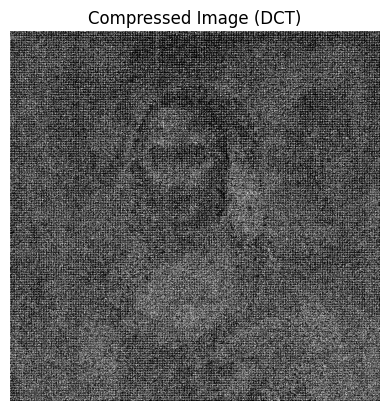

In [8]:
# DCT Compression
compressed_image = dct_compress(original_image)
plt.imshow(compressed_image, cmap='gray')
plt.title("Compressed Image (DCT)")
plt.axis('off')
plt.show()

In [9]:


# Compute Metrics
cr, mse, psnr = compute_metrics(original_image, compressed_image)
print(f"Compression Ratio (CR): {cr:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB")


Compression Ratio (CR): 1.00
Mean Squared Error (MSE): 13768.31
Peak Signal-to-Noise Ratio (PSNR): 6.74 dB


(np.float64(-0.5), np.float64(1199.5), np.float64(1199.5), np.float64(-0.5))

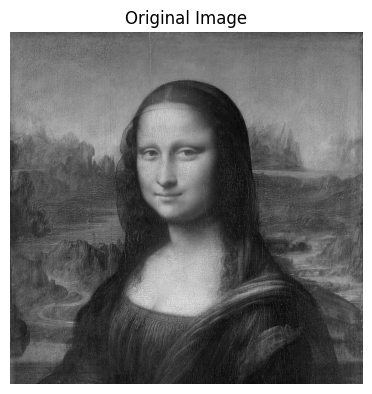

In [10]:
# Display Comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

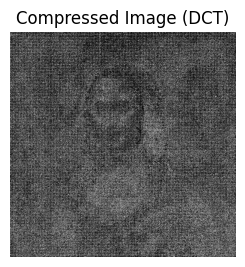

In [11]:
plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title("Compressed Image (DCT)")
plt.axis('off')

plt.show()

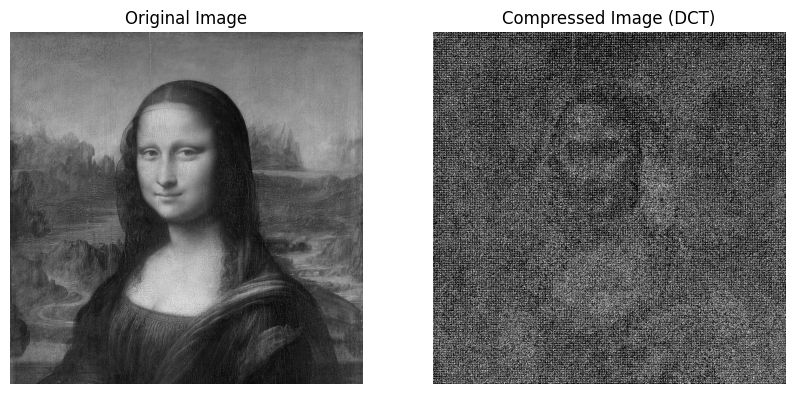

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title("Compressed Image (DCT)")
plt.axis('off')

plt.show()